# Airbnb NYC Listings  Data Exploration
## by Aregbesola Samuel


## About Dataset
This dataset describes the listing activity and metrics in NYC, NY for 2019.This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

[source](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Data Gathering

---

In [2]:
# load in the dataset into a pandas dataframe
airbnb_nyc = pd.read_csv('./AB_NYC_2019.csv')

## Data Assessment
---

In [3]:
airbnb_nyc.shape

(48895, 16)

In [4]:
airbnb_nyc.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [5]:
airbnb_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Main features of interest

The main features of the dataset are: 
* Price
* Number of reviews - More reviews can be associated with more patronage.  
* Neighbourhood group - Investigate the neighbourhood groups with the most listings, highest prices and patronage

### Supporting Features

* The latitude and longitude columns can be used to engineer new features such as: distance to major attraction sites
* Impact of availability on price can be examined 
* Host name can be used to determine the hosts with the most listings

### Check for Missing Values 

In [6]:
airbnb_nyc.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

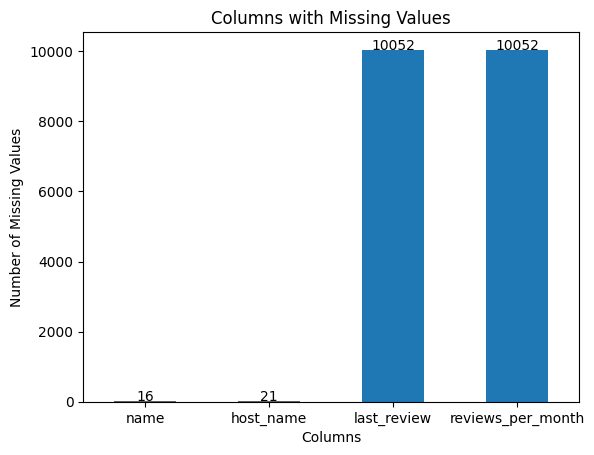

In [7]:
# count the number of missing values in each column
missing_values = airbnb_nyc.isna().sum()

# filter the result to include only columns with missing values
missing_values = missing_values.loc[missing_values > 0]

# plot the results as a bar chart
ax = missing_values.plot.bar()

# set the chart title and axis labels
ax.set_title('Columns with Missing Values')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of Missing Values')
plt.xticks(rotation=0)

# add labels for the count of missing values for each bar
for i, v in enumerate(missing_values):
    ax.text(i, v+1, str(v), ha='center',)

# display the chart
plt.show()


#### Observation
Four columns have missing values. (name, host_name, last_review, and reviews_per_month). This is a data quality issue

### Check the dataypes 

In [8]:
airbnb_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
airbnb_nyc.last_review.head()

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object

#### Observation 

the last_review has the wrong datatype

### Check for duplicates

In [10]:
airbnb_nyc.duplicated().sum()

0

## Cleaning data
---

In [11]:
# Make a copy of original data
airbnb_nyc_clean = airbnb_nyc.copy()

In [12]:
airbnb_nyc_clean.shape

(48895, 16)

### Issue #1: Deal with missing data in four columns

#### Define
Identify rows with missing data.<br>
last_review and reviews_per_month columns are related because missing values show that a review has not be provided for the associated listing. On the other hand, it is difficult to reconcile missing names and host names so the rows will be dropped.

1. Replace reviews_per_month with a score of 0
2. Last_review will be replaced with "2019-12-31" indicating that there is no review yet at the last day of the year
3. Drop missing rows corresponding to missing names and host names 

#### Code 

In [13]:
# replace reviews_per_month with a score of 0.0 
airbnb_nyc_clean['reviews_per_month'] = airbnb_nyc_clean.reviews_per_month.fillna(0.0)

In [14]:
#replace last_review with "2019-12-31"
airbnb_nyc_clean['last_review'] = airbnb_nyc_clean.last_review.fillna("2019-12-31")

In [15]:
#Drop missing rows corresponding to missing names and host names 
airbnb_nyc_clean = airbnb_nyc_clean.dropna(subset=['name'])
airbnb_nyc_clean = airbnb_nyc_clean.dropna(subset=['host_name'])

#### Test

In [16]:
#check that there are no more missing values
airbnb_nyc_clean[['name','host_name','number_of_reviews', 'last_review']].isna().sum()

name                 0
host_name            0
number_of_reviews    0
last_review          0
dtype: int64

In [17]:
#confirm that the right imputation is reflected in the dataframe
airbnb_nyc_clean[airbnb_nyc_clean.last_review == "2019-12-31"].shape

(10037, 16)

In [18]:
#confirm that the right imputation is reflected in the dataframe
airbnb_nyc_clean[airbnb_nyc_clean.reviews_per_month == 0.0].shape

(10037, 16)

### Issue #2: Deal with wrong datatypes

#### Define
1. The last_review column should be converted to date_time
2. Convert the room_type to category

#### Code 

In [19]:
#convert last review column to date_time
airbnb_nyc_clean['last_review'] = pd.to_datetime(airbnb_nyc_clean.last_review)

In [20]:
# #convert neighborhood_group to category
airbnb_nyc_clean['room_type'] = airbnb_nyc_clean.room_type.astype('category')

#### Test

In [21]:
#confirm the datatype changes have been effected
airbnb_nyc_clean[['last_review']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   last_review  48858 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 763.4 KB


### Feature Engineering

#### #1 Add a Month column
We need to know the months with the highest reviews

In [22]:
#list months in which last review was left
airbnb_nyc_clean['month'] = airbnb_nyc_clean.last_review.apply(lambda time: time.month)

In [23]:
#convert the values in Month from numbers to names of months
months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [24]:
# replace number with names of months in the month column
airbnb_nyc_clean['month'] = airbnb_nyc_clean.month.replace(months)

In [25]:
airbnb_nyc_clean.month.value_counts()

June         13586
December     11806
July          5933
May           4700
January       2766
April         2109
August        1663
October       1545
September     1535
March         1288
November      1157
February       770
Name: month, dtype: int64

#### #2 Add a coordinates column
This coordinates can be used to calculate distances to other points

In [26]:
#create a new coordinate column with the format (latitude, longitude)
airbnb_nyc_clean['property_coordinates'] = airbnb_nyc_clean.apply(lambda row: (row['latitude'], row['longitude']), axis=1)

In [27]:
#confirm that the column was created in the right format
airbnb_nyc_clean['property_coordinates'].head()

0    (40.64749, -73.97237)
1    (40.75362, -73.98377)
2     (40.80902, -73.9419)
3    (40.68514, -73.95976)
4    (40.79851, -73.94399)
Name: property_coordinates, dtype: object

#### #3. Add  Major Site Attractions and Attraction Coordinates columns

The neighbourhood_group column contains the boroughs of New York. The major attractions and distance to these major attractions could influence the price and or patronage of a particular Airbnb. 

In [28]:
# get the unique neighbourhood_groups categories
airbnb_nyc_clean.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

**Major attraction sites in each neighbourhood group as gathered by reviews on google**

1. Bronx: Yankee Stadium
2. Brooklyn: Brooklyn Bridge 
3. Manhattan: Central Park 
4. Queens: Metropolitan Art Museum
5. Staten Island: Snug Harbour Cultural Center

In [29]:
# Coordinates of selected major attractions
yankee_stadium = (40.829659, -73.926186) 
brooklyn_bridge = (40.706001,-73.997002)
central_park = (40.769361,-73.977655)
citi_field = (40.757256, -73.846237),
snug_harbour = (40.642631, -74.101917)

In [30]:
nyc_df = airbnb_nyc_clean.copy()

In [31]:
#Create a dictionary with the values in the neighbourhood group column and the associated attraction site
map_sites = {'Bronx':"Yankee Stadium", 'Brooklyn':"Brooklyn Bridge", 'Manhattan':"Central Park", 'Queens':"Citi Field", 'Staten Island':"Snug Harbour Cultural Center",}

#Creating a dictionary with the values in the neighbourhood group column to the coordinates of the related attraction
map_coordinates = {'Bronx':yankee_stadium, 'Brooklyn':brooklyn_bridge, 'Manhattan':central_park, 'Queens':citi_field, 'Staten Island':snug_harbour}

In [32]:
#Map the sites dictionary to the neighbourhood_group column in the Dataframe
airbnb_nyc_clean['major_attraction_sites'] = airbnb_nyc_clean['neighbourhood_group'].map(map_sites)

In [33]:
#Mapping our new dictionary to the neighbourhood_group column in the Dataframe
airbnb_nyc_clean['major_attraction_coordinates'] = airbnb_nyc_clean['neighbourhood_group'].map(map_coordinates)

In [34]:
airbnb_nyc_clean[['major_attraction_sites', 'major_attraction_coordinates']].head()

,major_attraction_sites,major_attraction_coordinates
0,Brooklyn Bridge,"(40.706001, -73.997002)"
1,Central Park,"(40.769361, -73.977655)"
2,Central Park,"(40.769361, -73.977655)"
3,Brooklyn Bridge,"(40.706001, -73.997002)"
4,Central Park,"(40.769361, -73.977655)"


#### 4. Calculate distance from airbnb to major attractions

The [geopy](https://geopy.readthedocs.io/en/stable/) library was installed `pip install geopy` and will be used to calculate the distance between the airbnb and major attraction sites using the coordinates. The distance in km will be utilized but kindly note that other units can be also be used.

In [35]:
# import geopy
import geopy.distance as gd
# calculate the distance between the property coordinates and major attraction coordinates in km then round to 2 decimal places
airbnb_nyc_clean['distance_to_attraction_sites'] = airbnb_nyc_clean.apply(lambda data: gd.geodesic(data.property_coordinates,
                                                   data.major_attraction_coordinates).km, axis=1).round(2)

In [36]:
#confirm the new columns have been properly effected
airbnb_nyc_clean[['major_attraction_sites', 'major_attraction_coordinates', 'distance_to_attraction_sites']].head()

,major_attraction_sites,major_attraction_coordinates,distance_to_attraction_sites
0,Brooklyn Bridge,"(40.706001, -73.997002)",6.82
1,Central Park,"(40.769361, -73.977655)",1.82
2,Central Park,"(40.769361, -73.977655)",5.34
3,Brooklyn Bridge,"(40.706001, -73.997002)",3.91
4,Central Park,"(40.769361, -73.977655)",4.31


### Save the clean & processed dataset

In [37]:
#Store the clean DataFrame in a CSV file
airbnb_nyc_clean.to_csv('airbnb_nyc_clean.csv', 
                 index=False)

---

## Univariate Exploration

Start by looking at the distribution of the main variable of interest: price

In [38]:
airbnb_nyc_clean.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,property_coordinates,major_attraction_sites,major_attraction_coordinates,distance_to_attraction_sites
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,2018-10-19,0.21,6,365,October,"(40.64749, -73.97237)",Brooklyn Bridge,"(40.706001, -73.997002)",6.82
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,45,2019-05-21,0.38,2,355,May,"(40.75362, -73.98377)",Central Park,"(40.769361, -73.977655)",1.82


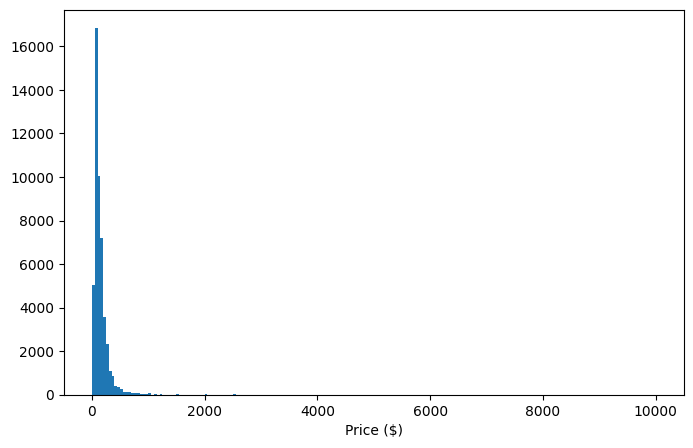

In [39]:
# start with a standard-scaled plot
binsize =50
bins = np.arange(0, airbnb_nyc_clean['price'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = airbnb_nyc_clean, x = 'price', bins = bins)
plt.xlabel('Price ($)')
plt.show()

### Price Distribution

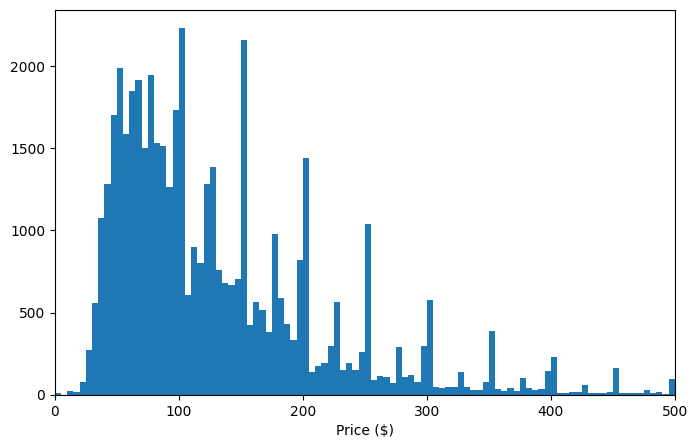

In [40]:
# investigating further on an even smaller bin size
binsize =5
bins = np.arange(0, airbnb_nyc_clean['price'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = airbnb_nyc_clean, x = 'price', bins = bins)
plt.xlim([0,500])
plt.xlabel('Price ($)')
plt.show()

#### Observations

* The Price is rightly skewed with a lot of properties with prices on the low end and a few on the high price end.

---
### Availability

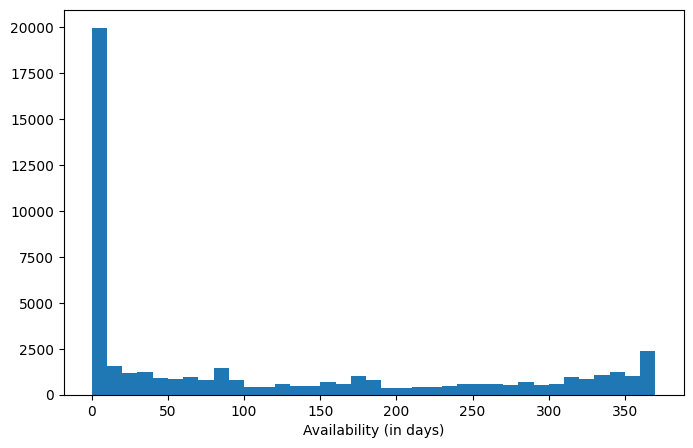

In [41]:
# start with a standard-scaled plot
binsize =10
bins = np.arange(0, airbnb_nyc_clean['availability_365'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = airbnb_nyc_clean, x = 'availability_365', bins = bins)
plt.xlabel('Availability (in days)')
plt.show()

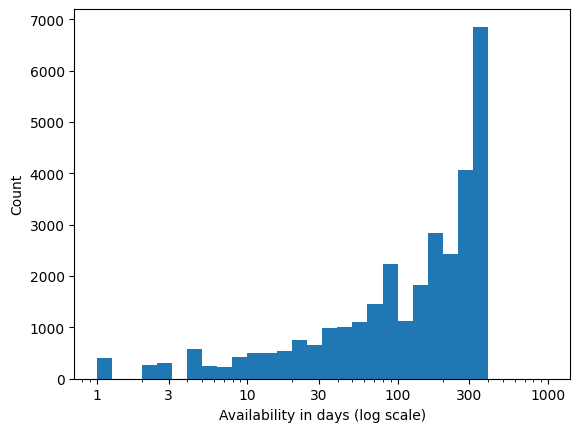

In [42]:

bins = 10 ** np.arange(0, 3+0.1, 0.1)


ticks = [1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Create the histogram
plt.hist(data = airbnb_nyc_clean, x = 'availability_365', bins = bins)

# Add labels
plt.xlabel('Availability in days (log scale)')
plt.xscale('log')
plt.ylabel('Count')

#Apply x-ticks
plt.xticks(ticks, labels);

# Show the plot
plt.show()


#### Observation
* Most of the houses are available between 0-10 days
* The log scale shows a distribution skewed to the left

---
### Distance to Attraction sites

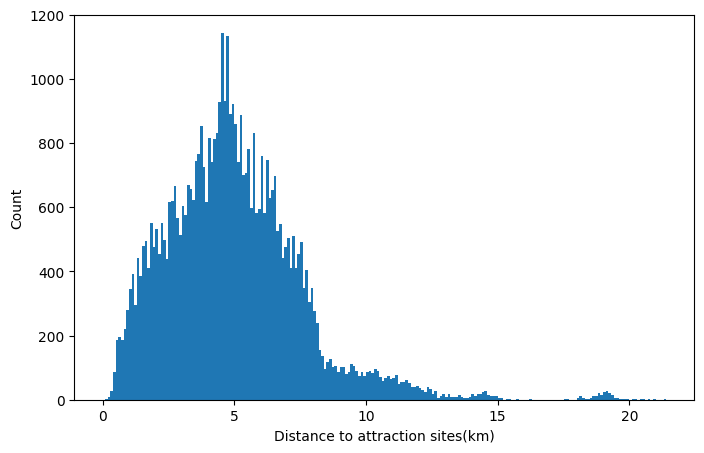

In [43]:
binsize =0.1
bins = np.arange(0, airbnb_nyc_clean['distance_to_attraction_sites'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = airbnb_nyc_clean, x = 'distance_to_attraction_sites', bins = bins)
plt.xlabel('Distance to attraction sites(km)')
plt.ylabel('Count')
plt.show()

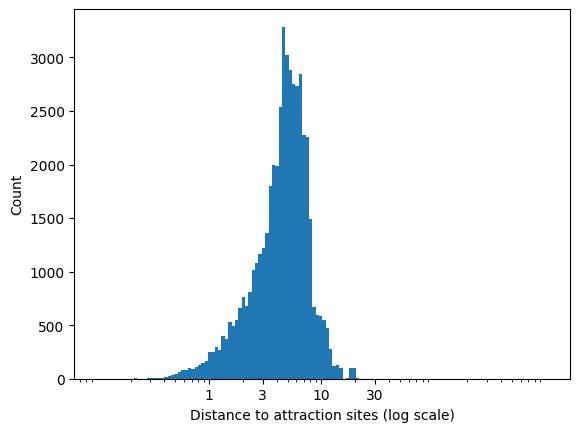

In [44]:
bins = 10 ** np.arange(-1, 3+0.03, 0.03)


ticks = [1, 3, 10, 30]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Create the histogram
plt.hist(data = airbnb_nyc_clean, x = 'distance_to_attraction_sites', bins = bins)

# Add labels
plt.xlabel('Distance to attraction sites (log scale)')
plt.xscale('log')
plt.ylabel('Count')

#Apply x-ticks
plt.xticks(ticks, labels);

# Show the plot
plt.show()

#### Observation
* Most of the airbnbs are within 10km of the major attraction sites 
* The distance to attraction sites also follows a log normal distribution which indicates a positive and multiplicative effect

---
### Number of reviews

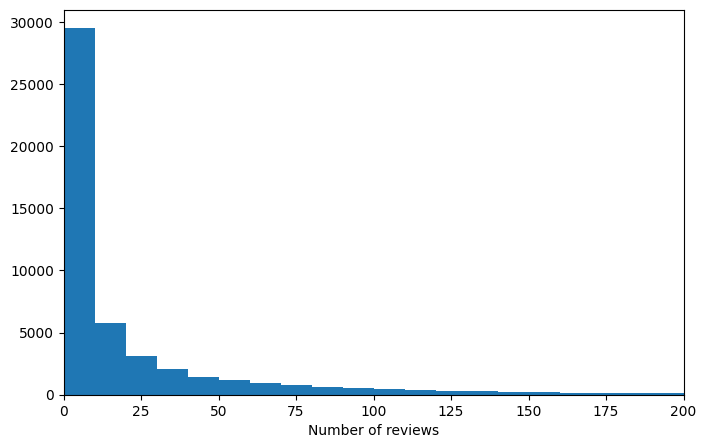

In [45]:
binsize =10
bins = np.arange(0, airbnb_nyc_clean['number_of_reviews'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.xlim(0,200)
plt.hist(data = airbnb_nyc_clean, x = 'number_of_reviews', bins = bins)
plt.xlabel('Number of reviews')
plt.show()

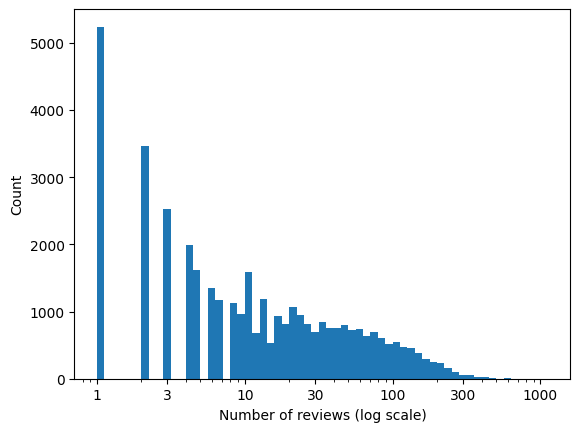

In [46]:

bins = 10 ** np.arange(0, 3+0.1, 0.05)


ticks = [1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Create the histogram
plt.hist(data = airbnb_nyc_clean, x = 'number_of_reviews', bins = bins)

# Add labels
plt.xlabel('Number of reviews (log scale)')
plt.xscale('log')
plt.ylabel('Count')

#Apply x-ticks
plt.xticks(ticks, labels);

# Show the plot
plt.show()


#### Observation
* Most properties have less than 100 reviews, and just over 20 reviews 

---
### Top 10 Airbnb owners in Newyork

In [47]:
## Extract relevant columns
host_df = airbnb_nyc_clean[['host_id', 'host_name']]

#extract the top ten host ids based on counts
host_count = host_df.host_id.value_counts()[:10]
host_order = host_count.index

In [48]:
#extract only the top ten names and using the host ids 
host_df = host_df[host_df.host_id.isin(host_order)]

In [49]:
# Sort the dataframe based on the counts in descending order
sorted_host_df = host_df.groupby('host_name').size().reset_index(name='counts').sort_values('counts', ascending=False)

In [50]:
sorted_df = sorted_host_df.reset_index(drop=True)
sorted_df.head(2)

,host_name,counts
0,Sonder (NYC),327
1,Blueground,232


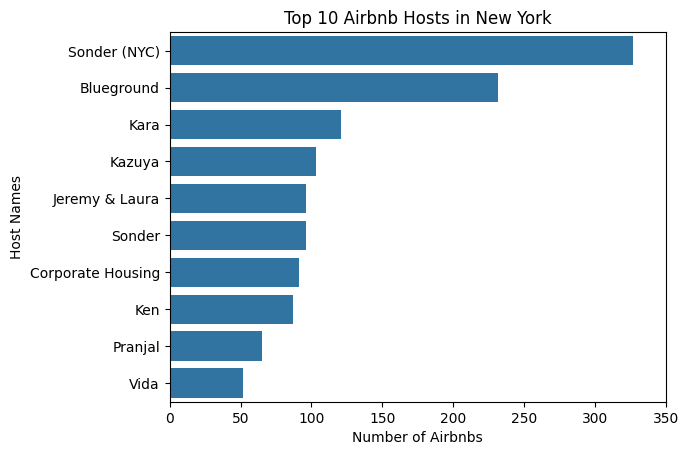

In [51]:
base_color = sb.color_palette()[0]
sb.countplot(data=host_df, y='host_name', color=base_color, order=sorted_df.host_name);
plt.xlim(0,350)
plt.xlabel('Number of Airbnbs')
plt.ylabel('Host Names')
plt.title('Top 10 Airbnb Hosts in New York')
plt.show()

#### Observation
* Sonder (NYC) have the most Airbnbs in the Newyork as at 2019
* All of the top ten hosts have atleast 50 different Airbnbs 

---
### Months

In [52]:
#order months by the number of listings 
months_order = airbnb_nyc_clean['month'].value_counts().index

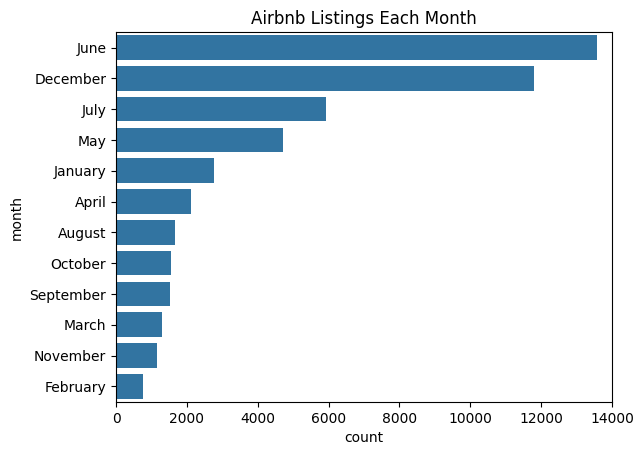

In [79]:
#plot months with the most listings 
sb.countplot(y='month',data=airbnb_nyc_clean, order=months_order, color=base_color)
plt.xlim(0,14000)
plt.title("Airbnb Listings Each Month");

#### Observation
* June had the most listings in 2019, closely followed by December
* March, November and Febraury make up the months with the lowest listings

---
### Top 10 Neighbourhoods

In [54]:
#order neighbourhood by number of listings
neighbourhood = airbnb_nyc_clean.neighbourhood.value_counts().sort_values(ascending=False).head(10)

#extract only the top ten names and using the host ids 
top_10_neighbourhoods = airbnb_nyc_clean[airbnb_nyc_clean.neighbourhood.isin(neighbourhood.index)]

#create a dataframe containing the neighbourhood and counts
neighbourhood_df = pd.DataFrame(neighbourhood).reset_index()

#rename the columns to match neigbourhood and count
neighbourhood_df= neighbourhood_df.rename(columns={'index':'neighbourhood', 'neighbourhood':'count'})

In [55]:
neighbourhood_df.head(2)

,neighbourhood,count
0,Williamsburg,3917
1,Bedford-Stuyvesant,3713


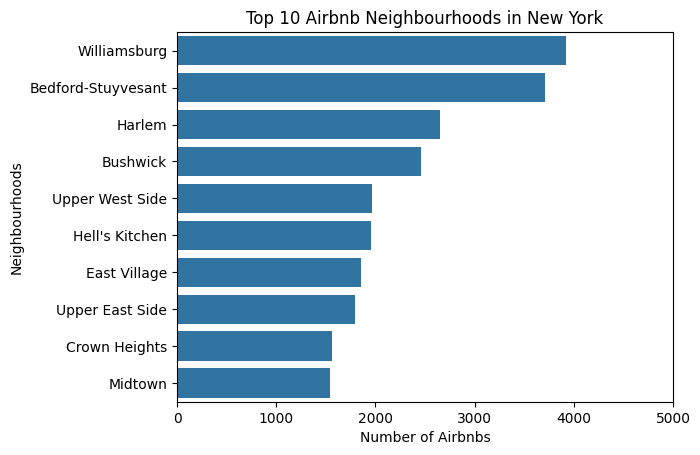

In [56]:
#plot neighbourhoods with the most listings 
base_color = sb.color_palette()[0]
sb.countplot(data=top_10_neighbourhoods, y='neighbourhood', color=base_color, order=neighbourhood_df.neighbourhood);
plt.xlim(0,5000)
plt.xlabel('Number of Airbnbs')
plt.ylabel('Neighbourhoods')
plt.title('Top 10 Airbnb Neighbourhoods in New York')
plt.show()

#### Observation
* Williamsburg is the top neighbourhood 
* All top 10 neighbourhoods have over 1500 Airbnbs

---
### Neighbourhoods group

In [57]:
#order months by the number of listings 
neighbourhoods_order = airbnb_nyc_clean['neighbourhood_group'].value_counts().index

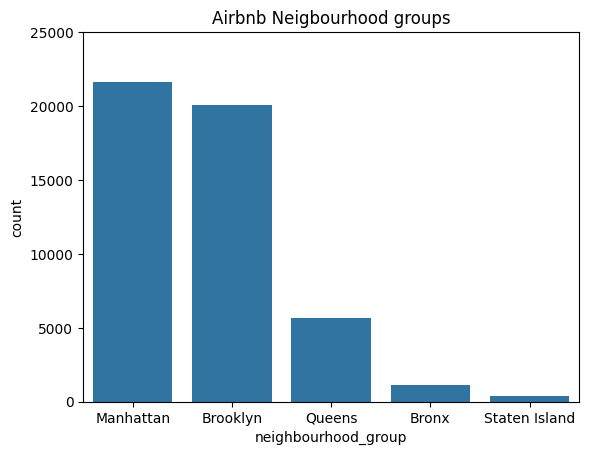

In [58]:
#plot months with the most listings 
sb.countplot(x='neighbourhood_group',data=airbnb_nyc_clean, order=neighbourhoods_order, color=base_color)
plt.ylim(0,25000)
plt.title("Airbnb Neigbourhood groups",);

#### Observation
* Most of the Airbnb listings in Newyork are in Manhattan and Brooklyn
* Bronx and Staten Island have the least listings

---
### Room type

In [59]:
#extract the counts of room types
room_counts= airbnb_nyc_clean['room_type'].value_counts()

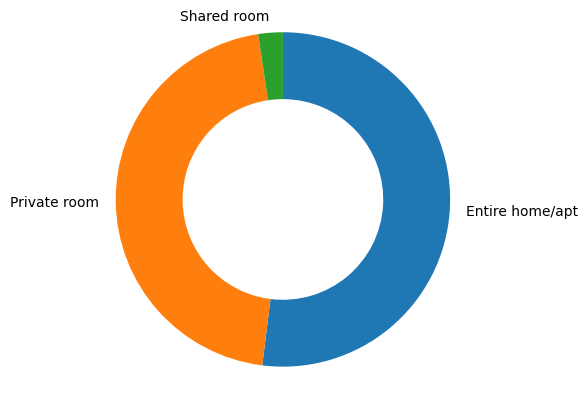

In [60]:
# Create a donut chart showing the room types 
plt.pie(room_counts, labels = room_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

#### Observation
* Entire homes private rooms make up the bulk of Airbnbs in Newyork
*Shared rooms are hard to come by in Newyork

---
## Bivariate Exploration

### Relationship between reviews per month and price
---

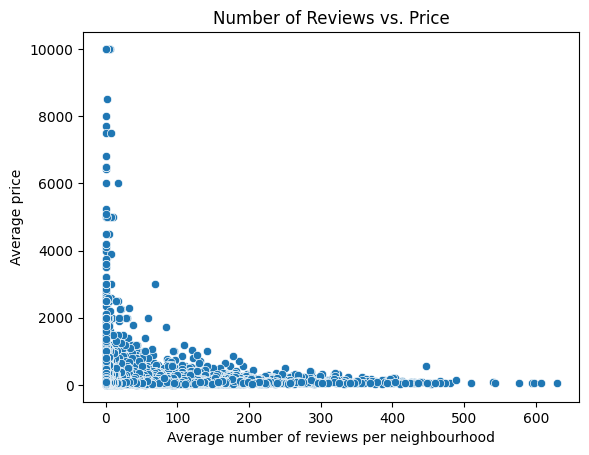

In [61]:
#plot scatter plot
sb.scatterplot(y='price',x='number_of_reviews', data=airbnb_nyc_clean)

#set titles and labels
plt.title("Number of Reviews vs. Price",);
plt.xlabel('Average number of reviews per neighbourhood')
plt.ylabel('Average price');

#### Observation

* Reviews for listings with lower prices outnumber those with higher prices on a monthly basis

### Relationship between average listing price for each neighbourhood and price
---

In [62]:
# Identifying the average listing price for each neighbourhood (rounded to 2 decimal places)
price_by_neighbourhood = nyc_df.groupby('neighbourhood')['price'].mean().round(2)

#Converting the series nbhd to a dataframe
price_by_neighbourhood = pd.DataFrame(price_by_neighbourhood)

#Rename columns
price_by_neighbourhood = price_by_neighbourhood.rename(columns={'price': 'average_price'})

# Identifying the average number of reviews for each neighbourhood (rounded to 2 decimal places)
price_by_neighbourhood['average_number_of_reviews'] = airbnb_nyc_clean.groupby('neighbourhood')['number_of_reviews'].mean().round(2)

In [63]:
price_by_neighbourhood.head()

,average_price,average_number_of_reviews
neighbourhood,,
Allerton,87.60,42.93
Arden Heights,67.25,7.75
Arrochar,115.00,14.62
Arverne,171.78,29.26
Astoria,117.19,21.46


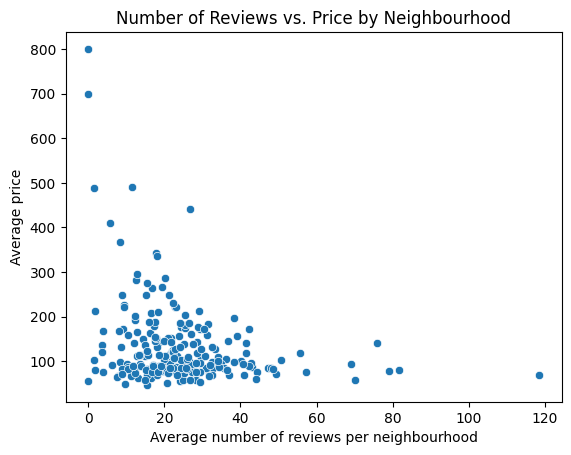

In [64]:
#plot scatterplots
sb.scatterplot(x='average_number_of_reviews',y='average_price', data=price_by_neighbourhood)

#set titles and labels
plt.title("Number of Reviews vs. Price by Neighbourhood",);
plt.xlabel('Average number of reviews per neighbourhood')
plt.ylabel('Average price');

#### Observation

* Average reviews for listings with lower prices outnumber those with higher prices
* Looking at the last two plots, it can be assumed that listings with lower prices are patronized more, hence more reviews

In [65]:
airbnb_nyc_clean.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'month', 'property_coordinates',
       'major_attraction_sites', 'major_attraction_coordinates',
       'distance_to_attraction_sites'],
      dtype='object')

### Relationship between distance to major sites of attraction and number of reviews
---

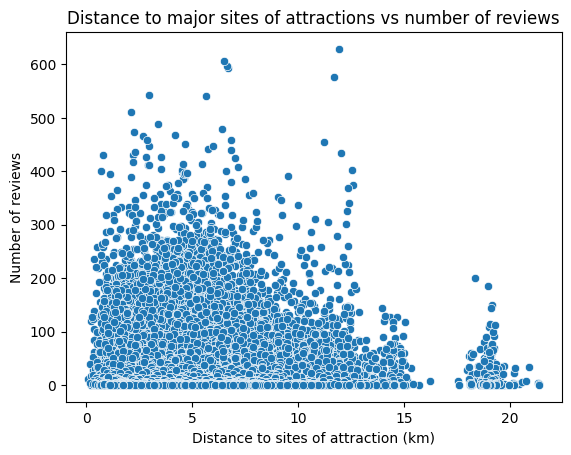

In [66]:
# plot scatterplot
sb.scatterplot(data=airbnb_nyc_clean, x='distance_to_attraction_sites', y='number_of_reviews')

#set titles and labels
plt.title('Distance to major sites of attractions vs number of reviews')
plt.xlabel('Distance to sites of attraction (km)')
plt.ylabel('Number of reviews');

#### Observation

* Listings less than 5km away from the selected sites of attraction enjoy more reviews
* Listings greater than 15km away from the sites of attractions are barely reviewed
* It is safe to assume that more reviews equal more patronage, therefore, proximity to sites of attraction affects patronage of Airbnbs

In [67]:
#get the average price of listings by neighbourhood groups
avg_price_by_neighbourhood = airbnb_nyc_clean.groupby('neighbourhood_group')['price'].mean()

# Print the average price per neighbourhood group
avg_price_by_neighbourhood = pd.DataFrame(avg_price_by_neighbourhood).reset_index().sort_values(
                            by='price',ascending=False).round(2)
avg_price_by_neighbourhood

,neighbourhood_group,price
2,Manhattan,196.90
1,Brooklyn,124.41
4,Staten Island,114.81
3,Queens,99.54
0,Bronx,87.47


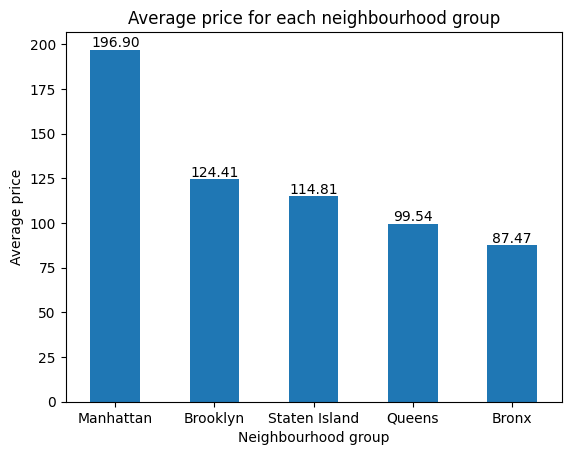

In [68]:
#plot barplot
ax = avg_price_by_neighbourhood.plot(kind='bar', x='neighbourhood_group', y='price')

#labels and title
plt.xlabel('Neighbourhood group')
plt.ylabel('Average price')
plt.title('Average price for each neighbourhood group');

for c in ax.containers:
    ax.bar_label(c, label_type='edge', labels=[f'{h:.2f}' for h in c.datavalues])

plt.xticks(rotation=0)
ax.get_legend().remove()

#### Observation

* On average, listings in Manhattan are the most expensive
* Listings in Bronx are the cheapest on average

### Most popular Neighbourhood groups by room type
---

In [69]:
#Use group_by() and size() to get the number of room types and each combination of the five neighbourhood groups as a pandas Series

nhood_room_type = airbnb_nyc_clean.groupby(['neighbourhood_group', 'room_type']).size()

In [70]:
# Use Series.reset_index() to convert a series into a dataframe object
nhood_room_type = nhood_room_type.reset_index(name='count')

In [71]:
nhood_room_type.head()

,neighbourhood_group,room_type,count
0,Bronx,Entire home/apt,378
1,Bronx,Private room,652
2,Bronx,Shared room,59
3,Brooklyn,Entire home/apt,9553
4,Brooklyn,Private room,10123


In [72]:
# Use DataFrame.pivot() to rearrange the data, to have room type on rows
nhood_room_type = nhood_room_type.pivot(index = 'neighbourhood_group', columns = 'room_type', values = 'count')

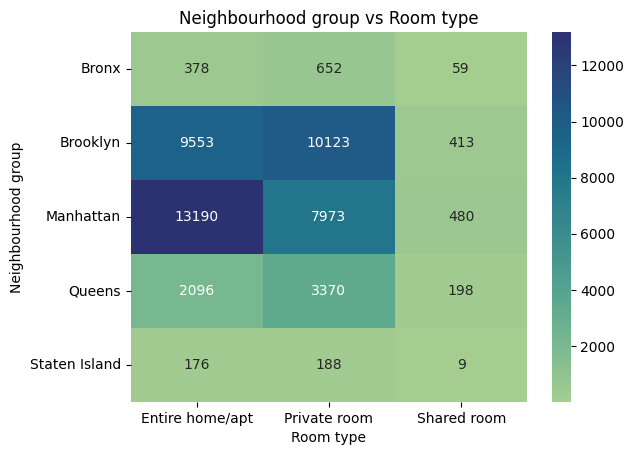

In [73]:
#plot the heat map
sb.heatmap(nhood_room_type, annot = True, fmt = 'd', cmap='crest')

#set the labels and title
plt.ylabel('Neighbourhood group')
plt.xlabel('Room type')
plt.title('Neighbourhood group vs Room type')
plt.yticks(rotation=0);


#### Observation

* In Bronx, Brooklyn, Queens and Statten Island, the number of Entire home/appartments are lower than private rooms
* For all neighbourhood groups, shared rooms are difficult to come by
* In Manhattan the entire home/apartments make up the most 


# Multivariate Exploration


### Correlation between features

---

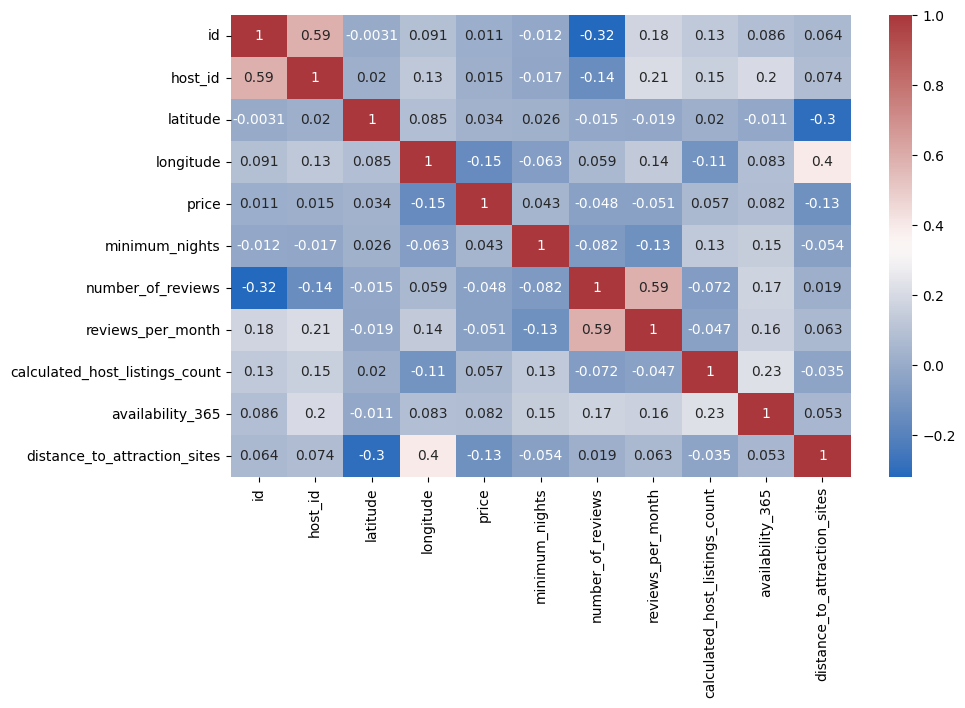

In [74]:
plt.figure(figsize=(10,6))
sb.heatmap(airbnb_nyc_clean.corr(), annot=True, cmap='vlag');

#### Observation

* Most of the features in the dataset are not correlated
* Reviews per month and number of reviews are correlated

---

### Coordinates by Neighbourhood groups

In [75]:
airbnb_nyc_clean['neighbourhood_group'] = airbnb_nyc_clean.neighbourhood_group.astype("category")

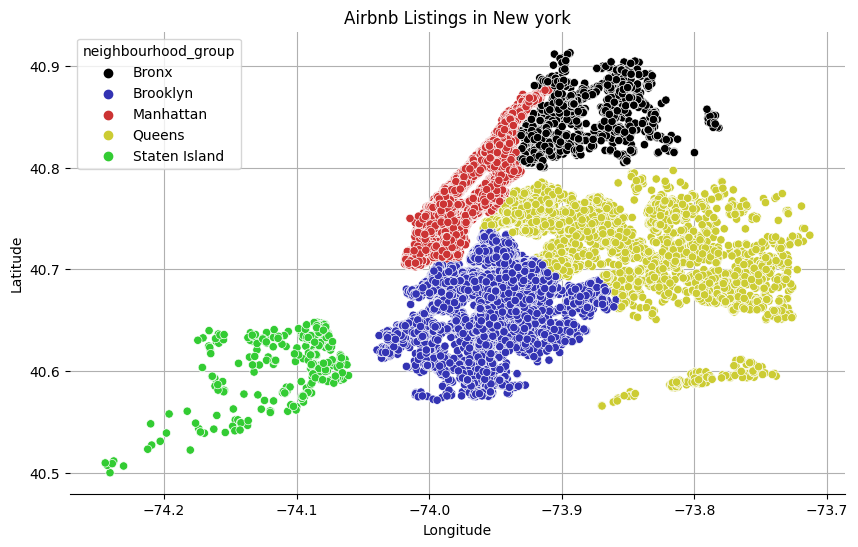

In [76]:
plt.figure(figsize=(10,6))

# create a custom color palette that resembles a map
map_palette = sb.color_palette([(0, 0, 0), (0.2, 0.2, 0.7), (0.8, 0.2, 0.2), (0.8, 0.8, 0.2), (0.2, 0.8, 0.2)])

#setup scatterplot
ax = sb.scatterplot(x='longitude', y='latitude', data=airbnb_nyc_clean, hue='neighbourhood_group', palette=map_palette)

#remove borders of plot
sb.despine(top=True, right=True, left=True)

#set labels and titles
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb Listings in New york')

#create a grid 
ax.grid();

#send grid to the background
ax.set_axisbelow(True);

#### Observation

* Properties in Queens have a wide spread accross the longitudinal axis
* Properties in Manhattan have the widest spread accross the latitudinal axis
* The Bronx and Staten Island have the fewest number of listings

---

### Coordinates by Neighbourhood groups and attraction sites

In [77]:
major_attractions = {'Yankee Stadium': (40.829659, -73.926186) ,
                     'Brooklyn Bridge': (40.706001,-73.997002),
                     'Central Park': (40.769361,-73.977655),
                     'Citi Field': (40.757256, -73.846237),
                     'Snug Harbour': (40.642631, -74.101917)}

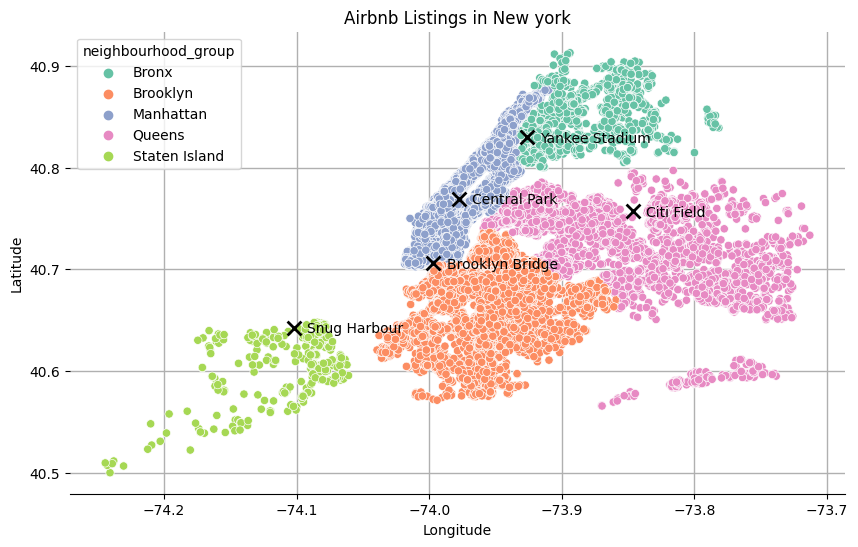

In [78]:
plt.figure(figsize=(10,6))

# create a custom color palette that resembles a map
map_palette = sb.color_palette([(0, 0, 0), (0.2, 0.2, 0.7), (0.8, 0.2, 0.2), (0.8, 0.8, 0.2), (0.2, 0.8, 0.2)])

#setup scatterplot
ax = sb.scatterplot(x='longitude', y='latitude', data=airbnb_nyc_clean, hue='neighbourhood_group', palette="Set2")

#remove borders of plot
sb.despine(top=True, right=True, left=True)

# plot the locations of the major sites of attractions
for location, coordinates in major_attractions.items():
    plt.scatter(coordinates[1], coordinates[0], marker='x', color='black', s=100, linewidth=2)
    plt.text(coordinates[1] + 0.01, coordinates[0] - 0.005, location, )

#set labels and titles
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb Listings in New york');

#add plot grid
ax.grid(lw=1)

#send grid to the background
ax.set_axisbelow(True);

#### Observation

* Central Park is 'central' to most properties in Manhattan across longitude and latitude
* Citi field is central to properties in Queens accross the longitudinal axis

## Conclusion

#### Price

* Listings in Manhattan have the highest average prices
* Listings in Bronx have the lowest average prices
* Entire home/apartments are the most expensive types of Airbnbs


#### Reviews

* The closer the listing to a major site of attraction, the higher the reviews
* Cheaper properties ae the most reviewed properties.
* June is the month with the most reviews. This could be because June signals the beginning of Summer.
* The festive season (i.e. December) also comes with a lot of reviews

#### Neighbourhoods

* Williamsburg is the neighbourhood with the highest number of listings. There must be a high influx of visitors in the area.
* Most properties in Manhattan are in close proximity to Central park
* Listings in Queens are the have the highest spread in the longitudinal direction
* In all neighbourhoods, there are little to no shared room apartments